In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
%matplotlib inline
plt.style.use('seaborn-muted')

# Measurements of Inequality

## The Lorenz Curve
The Lorenz Curve visually presents income inequality by plotting household income percentile on the $x$-axis, and the cumulative income share that the bottom $x$ percentile own on the $y$-axis. The households are sorted by income, so that the first household at the 0th percentile has the least amount of income, while the household at the 100th percentile has the greatest income.

For any point $(x,y)$ on the Lorenz curve, “the bottom x percent own y% of the income”. For example, if the $x$-axis reads 0.30 and $y$-axis reads 0.10, then it means that the bottom 30% of the population received 10% of the total population's income. This yields 2 implications for the Lorenz Curve:
- The points $(0,0)$ and $(1,1)$ are always on the curve. $(0,0)$ represents the 0% of the population owning 0% of the income and $(1,1)$ represents 100% of the population owning 100% of the income.
- The slope is always increasing. This is because households are sorted by income as percentiles: for a slight increase in $x$, households become richer and hence provide a larger share of total income.


### Line of Perfect Equality
In a world of perfect equality, everyone would have the exact same income. In this case, the Lorenz curve would just be a 45-degree straight line that runs through $(0,0)$ and $(1,1)$, i.e. $y=x$. Mathematically, this is because the derivative is constant: for a slight increase in $x$, the total share of income increases at a constant rate. Another way to think about this is that the bottom 10% of the population will own 10% of the total income, the bottom 50% of the population will own 50% of the total income, and so on. This line is known as the *line of perfect equality*, and we typically display this line when plotting our Lorenz curves as a reference.

### A Toy Example
Let's suppose country 1 has the following income distribution: 
- The bottom 10% owns a cumulative 2% of total income 
- The bottom 20% owns 5% of total income
- The bottom 30% owns 9% of total income
- The bottom 40% owns 15% of total income 
- The bottom 50% owns 23% of total income
- The bottom 60% owns 33% of total income
- The bottom 70% with 45% of total income
- The bottom 80% with 59% of total income 
- The bottom 90% with 75% of total income
- The bottom 100% with 100% of total income

We will create an array of income shares and call it `Country1`. 

In [3]:
Country1 = make_array(0, 0.02, 0.05, 0.09, 0.15, 0.23, 0.33, 0.45, 0.59, 0.75, 1.0)

To better see this information, we will create a table containing population percentage and cumulative income share. 

In [5]:
income_distribution = Table().with_columns(
    "Population Percentage (%)", np.arange(11) * 10, 
    "Cumulative Income Share (%)", Country1 * 100, 
    "Perfect Equality Income Share (%)", np.arange(11) * 10
)
income_distribution

Population Percentage (%),Cumulative Income Share (%),Perfect Equality Income Share (%)
0,0,0
10,2,10
20,5,20
30,9,30
40,15,40
50,23,50
60,33,60
70,45,70
80,59,80
90,75,90


How will the Lorenz Curve for this income distribution look? 

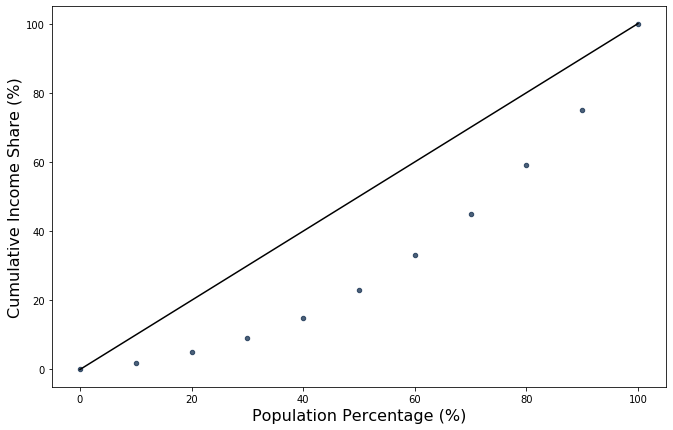

In [7]:
income_distribution.scatter(0, 1, width=11, height=7)
plt.plot([0,100], [0,100], color='k');

### Comparing Lorenz Curves
Now let's compare 2 countries' Lorenz curves. Suppose country 2 has the following income distribution:
- The bottom 10% owns a cumulative 3% of total income 
- The bottom 20% owns 7% of total income
- The bottom 30% owns 13% of total income
- The bottom 40% owns 19% of total income 
- The bottom 50% owns 27% of total income
- The bottom 60% owns 37% of total income
- The bottom 70% with 50% of total income
- The bottom 80% with 65% of total income 
- The bottom 90% with 81% of total income
- The bottom 100% with 100% of total income

In [8]:
Country2 = make_array(0, 0.03, 0.07, 0.13, 0.19, 0.27, 0.37, 0.5, 0.65, 0.81, 1.0)
income_distribution2 = Table().with_columns(
    "Population Percentage (%)", np.arange(11) * 10, 
    "Cumulative Income Share (%)", Country2 * 100, 
    "Perfect Equality Income Share (%)", np.arange(11) * 10
)
income_distribution2

Population Percentage (%),Cumulative Income Share (%),Perfect Equality Income Share (%)
0,0,0
10,3,10
20,7,20
30,13,30
40,19,40
50,27,50
60,37,60
70,50,70
80,65,80
90,81,90


Comparing the 2 countries' income distributions side by side:

In [10]:
income_distribution.join(
    ["Population Percentage (%)", "Perfect Equality Income Share (%)"], 
    income_distribution2, ["Population Percentage (%)", "Perfect Equality Income Share (%)"]
).relabel(
    "Cumulative Income Share (%)", "Country 1 Cumulative Income Share (%)"
).relabel(
    "Cumulative Income Share (%)_2", "Country 2 Cumulative Income Share (%)"
)

Population Percentage (%),Perfect Equality Income Share (%),Country 1 Cumulative Income Share (%),Country 2 Cumulative Income Share (%)
0,0,0,0
10,10,2,3
20,20,5,7
30,30,9,13
40,40,15,19
50,50,23,27
60,60,33,37
70,70,45,50
80,80,59,65
90,90,75,81


Plotting both countries' Lorenz curves, can you tell which country has a higher level of income inequality?

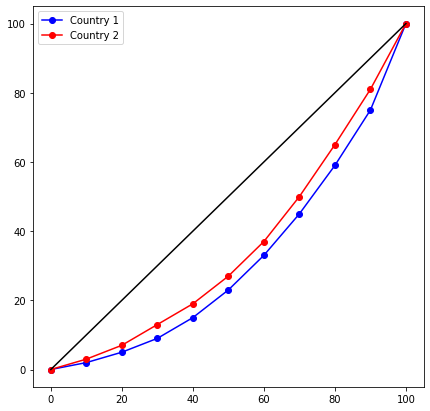

In [13]:
plt.figure(figsize=[7,7])
plt.plot(income_distribution.column(0), income_distribution.column(1), "-o", c = 'b')
plt.plot(income_distribution.column(0), income_distribution2.column(1), "-o", c = 'r')
plt.legend(["Country 1", "Country 2"])
plt.plot([0,100], [0,100], color='k');

In this case, we can see that country 2's Lorenz curve is closer to the line of equality than that of country 1, which intuitively would suggest that country 2 is more equal. If we were to look at the numbers, we see that the bottom percentiles own a higher % of total national income in country 2 than in country 1, while top percentiles own less in country 2 than in country 1. This would suggest that country 2 is more equal in income than country 1, so that country 1 has a higher level of income inequality.

But now let's consider a different case; suppose country 3 has the following distribution: 

In [14]:
Country3 = make_array(0, 0.03, 0.07, 0.12, 0.18, 0.25, 0.33, 0.42, 0.54, 0.73, 1.0)
income_distribution3 = Table().with_columns(
    "Population Percentage (%)", np.arange(11) * 10, 
    "Cumulative Income Share (%)", Country3 * 100, 
    "Perfect Equality Income Share (%)", np.arange(11) * 10
)
income_distribution.join(
    ["Population Percentage (%)", "Perfect Equality Income Share (%)"], 
    income_distribution3, ["Population Percentage (%)", "Perfect Equality Income Share (%)"]
).relabel(
    "Cumulative Income Share (%)", "Country 1 Cumulative Income Share (%)"
).relabel(
    "Cumulative Income Share (%)_2", "Country 3 Cumulative Income Share (%)"
)

Population Percentage (%),Perfect Equality Income Share (%),Country 1 Cumulative Income Share (%),Country 3 Cumulative Income Share (%)
0,0,0,0
10,10,2,3
20,20,5,7
30,30,9,12
40,40,15,18
50,50,23,25
60,60,33,33
70,70,45,42
80,80,59,54
90,90,75,73


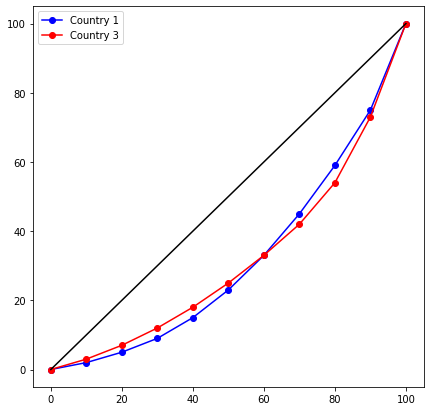

In [15]:
plt.figure(figsize=[7,7])
plt.plot(income_distribution.column(0), income_distribution.column(1), "-o", c = 'b')
plt.plot(income_distribution.column(0), income_distribution3.column(1), "-o", c = 'r')
plt.legend(["Country 1", "Country 3"])
plt.plot([0,100], [0,100], color='k');

Now, ambiguity arises; while bottom income percentiles earn a larger share of national income in country 3, top income percentiles also have a larger share. We can visualize this phenomenon by the 'crossing' of Lorenz curves on the plot. As a result, we do cannot easily tell which country has a higher level of income inequality.

As you may see, the Lorenz curve is not able to produce a 'quantitative' measure of income inequality, making the scenario above hard for us to compare the 2 countries. For this, we turn to the Gini coefficient.

## The Gini Coefficient

We can use the Gini coefficeint to quantify the level of income inequality.

```{figure} Gini.png
---
width: 500px
name: gini-coefficient
---
The Gini coefficient
```

![](Gini.png)

```{admonition} Definition

The **Gini coefficient** is the ratio of the area between the line of equality and the Lorenz curve to the total area under the line of equality. Referring to $A$ and $B$ from {numref}`gini-coefficient`:

$$\text{Gini} = \frac{\text{Area between line of equality and Lorenz curve}}{\text{Area under line of equality}} = \frac{A}{A+B}$$

If we express the Lorenz curve as $L(x)$, we can use calculus to derive an equation for the Gini coefficient:

$$\text{Gini} = \frac{\frac{1}{2} - \int_0^1 L(x)\text{d}x}{\frac{1}{2}} = 1 - 2\int_0^1 L(x)\text{d}x$$
```

Intuitively, the closer the Lorenz curve is to the line of equality, the lower income inequality exists. Hence, the smaller the area of A, the lower the inequality. **This means that the smaller the Gini coefficient, the lower the income inequality.** Also note that the Gini coefficient will always be between 0 and 1. Mathematically, since $A$ and $B$ are both positive, $0<\frac{A}{A+B}<1$.

In [16]:
# This function estimates the Gini coefficient. You don't have to understand how this code works below.
def gini(distribution):
    sorted_distribution = sorted(distribution)
    height = 0
    area = 0
    for i in sorted_distribution:
        height += i
        area += height - i / 2
    fair_area = height * len(distribution) / 2.
    return (fair_area - area) / fair_area

When we use our population as the parameter to the `gini` function, we get: 

In [17]:
gini_coefficient_country1 = gini(Country1)
gini_coefficient_country1

0.518628912071535

In [18]:
gini_coefficient_country2 = gini(Country2)
gini_coefficient_country2

0.48756218905472637

In [19]:
gini_coefficient_country3 = gini(Country3)
gini_coefficient_country3

0.4934357195937577

These results confirm our intuition from the analysis we did previously via Lorenz curves. Previously, we concluded that country 1 had a higher level of income inequality than country 2, and this is supported by country 1's higher gini coefficient. On the other hand, we had trouble comparing levels of inequality between country 1 and country 3. Here, the gini coefficient would indicate that country 1 has a higher level of income inequality than country 3.

## Other Forms of Measurement

The Gini coefficient is a fairly comprehensive and robust measure of inequality with just a single value: as we've seen above, we look at the entire population's income distribution to determine the Gini coefficient. As a result, calculating the Gini is often a challenging task. In reality, we will never observe the true population Lorenz curve without conducting a census to know how much exactly each household earns. As a result, economists will often attempt to interpolate the Lorenz curve and consequent Gini coefficient from the data they have available. The Gini coefficient is also not as easy to understand or explain; the value by itself does not have significant meaning.

Instead, another common measure of income inequality is the share of income earned by the "top $x$%" or the "bottom $y$%". These measures are more often used in the media or by politicians in discussing the extent of inequality, since they are much easier to understand. Consider the chart below, which plots the share of income earned by the top 1%, bottom 90%, and the 90-99%:

```{figure} alt_measure.png
---
---
Alternative forms of measurement
```

![](alt_measure.png)